In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 
import warnings
import os

from colorsetup import colors, palette
sns.set_palette(palette)

ModuleNotFoundError: ignored

In [2]:
!pip install lifelines

     |████████████████████████████████| 348kB 6.5MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=6d171c5303c966536ebe83b63a687f775fbc61159e72c2e8936fc6128df0c77b
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [4]:
df = pd.read_csv('finaldataset1.csv')
df

,location,day,total cases,avg_new/total,growth rate,population density,avg_new cases,status
0,Australia,30,15,0.033333,0.094000,0,0.500000,1
1,Australia,60,1682,0.031968,0.170374,0,53.770000,1
2,Australia,90,6652,0.024905,0.046898,0,165.670000,0
3,Australia,120,7099,0.002099,0.002170,0,14.900000,0
4,Australia,150,7474,0.001672,0.001717,0,12.500000,0
...,...,...,...,...,...,...,...,...
125,Nepal,180,17844,0.017259,0.024609,1,307.966667,1
126,Nepal,210,28938,0.012779,0.016247,1,369.800000,1
127,Nepal,240,61593,0.017672,0.025499,1,1088.500000,1
128,Nepal,270,132246,0.017808,0.025798,1,2355.100000,1


In [8]:
dfu = df[['day','growth rate','avg_new/total','population density','status']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['day'] = df.day
dfd.rename(columns={'population density':'Pden'}, inplace=True)

In [9]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='day', event_col='status')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 130 total observations, 38 right-censored observations>
             duration col = 'day'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 130
number of events observed = 92
   partial log-likelihood = -296.89
         time fit was run = 2020-12-22 20:08:39 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
growth rate     7.24    1397.40       2.68             1.99            12.49                 7.34             2.66e+05
avg_new/total 121.75   7.52e+52      17.92            86.63           156.87             4.22e+37             1.34e+68
total cases    -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Pden           -0.30       0.74       0.23        

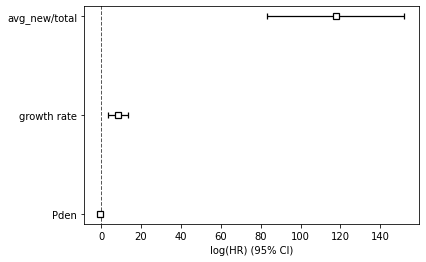

In [7]:
cph.plot()